# Working with Array Data

Data frames are a great choice when your data can be organized as a table (i.e., laid out in rows and columns), but what if your data are naturally multidimensional? What if you need to perform serious number crunching &mdash; matrix algebra, signal, or image processing &mdash; in order to get to a result? For these needs the NumPy package provides a general data type, the n-dimensional array or `ndarray`. This data type is so powerful that it forms the basis for most serious numerical processing in Python, including Pandas, SciPy, and image processing packages like scikit-image.

In this lesson, we'll get you used to working with arrays: how to learn about them, select sets of data within them, and plot them. Again, we'll only cover the basics, but the NumPy documentation is thorough and easy to search on the web.

# Warm-up: Lists

Lists are one of the fundamental data types in Python. A list is, well, a list of objects:

In [1]:
a = 1.5
b = 'spam'
mylist = [2, 7, a, 'eggs', b]
print(mylist)

[2, 7, 1.5, 'eggs', 'spam']


Lists are defined with using square brackets, and can contain variables of any type, separated by commas. 

Again, elements of a list can be anything even other lists:

In [2]:
another_list = ['pooh', 'piglet']
mylist.append(another_list)  # we can use this to append to a list (in-place)
print(mylist)
print(len(mylist))

mylist = mylist + [1, 1.7, -2]  # concatenation is easy!
print(mylist)

[2, 7, 1.5, 'eggs', 'spam', ['pooh', 'piglet']]
6
[2, 7, 1.5, 'eggs', 'spam', ['pooh', 'piglet'], 1, 1.7, -2]


We can access the elements of a list using square brackets, just as we did with Pandas. Python is a very consistent language, so the pattern "get an item using square brackets" will show up over and over again.

In [3]:
print(mylist[0])  # first element
print(mylist[2])  # third element
print(mylist[-1])  # last element
print(mylist[-2])  # penultimate element

2
1.5
-2
1.7


We can also use a technique called slicing to get subsequences from the list:

In [4]:
print(mylist[:])  # all elements
print(mylist[1:3])  # elements >= 1 and < 3 (note that element 3 is *not* included)
print(mylist[:-1])  # all but last element
print(mylist[3:])  # elements 3 to end
print(mylist[::2])  # every other element

[2, 7, 1.5, 'eggs', 'spam', ['pooh', 'piglet'], 1, 1.7, -2]
[7, 1.5]
[2, 7, 1.5, 'eggs', 'spam', ['pooh', 'piglet'], 1, 1.7]
['eggs', 'spam', ['pooh', 'piglet'], 1, 1.7, -2]
[2, 1.5, 'spam', 1, -2]


Note that we can use a *slice* object inside the brackets. This object is of the form `start:stop:step`. Note that the `start` element is included, but the `stop` element is not. Any of these arguments can be omitted, in which case 
* `start` is assumed to be 0
* `stop` is assumed to be `len(mylist)`
* `step` is assumed to be 1

# Warm-up: Lists of lists

In cases where we have a matrix of data we want to represent, a natural way to do that is as a list of lists:

In [5]:
mydata = [[1, 2, 3], [4, 5, 6]]
print(mydata)
print(len(mydata))

[[1, 2, 3], [4, 5, 6]]
2


This is a nested list. It has two elements:

In [6]:
mydata[0]

[1, 2, 3]

and we can get individual data by accessing the list inside a list

In [7]:
print(mydata[0][1])

2


We can think of this in analogy with a 2 x 3 matrix, where the first index gives the row, and the second index gives the column.

In this case, `mydata[0][1]` instructs us to get the 0th element of `mydata` (the first row), and the 1st element from that (the second column).

However, there are some drawbacks for using lists to represent large arrays of data:
- Lists are flexible in that the elements of the list can be of any type, but this makes them slower and less memory-efficient than arrays where all the elements are of the same type (e.g., integer or decimal numbers).
- It's pretty clear what `mydata[0][1]` does, but for arrays with many dimensions, we might like to write something simpler, like `mydata[0, 1]`. Doing this with lists gives an error.
- We would also like to do math with matrices, but since lists can contain anything, Python lacks a notion of math operations on lists

The NumPy package resolves these issues by defining the `ndarray`...

# The NumPy array:

If we already have a list of lists, NumPy gives us a clear way to convert it to an array:

In [8]:
import numpy as np  # this nickname (numpy = np) is so common as to be ubiquitous

In [9]:
myarray = np.array(mydata)
print(myarray)
print(type(myarray))

[[1 2 3]
 [4 5 6]]
<class 'numpy.ndarray'>


Note that the `myarray` variable is a `numpy.ndarray`, and that it prints a little prettier than the list of lists, making clear that it's a 2 x 3 matrix. In fact, just like with Pandas, we can find out the dimensions of an array with the `shape` attribute (note again the consistency of syntax across data types in Python):

In [10]:
print(myarray.shape)

(2, 3)


We can use some of the same syntax as before:

In [11]:
print(myarray[0])
print(myarray[0].shape)

[1 2 3]
(3,)


Just as before, the 0th element is the first row. In this case, however, the 0th element is an array of shape `(3,)`, a vector of length 3. We will see that selecting rows or columns from an array returns a *view* of that array, with dimensions correspondingly reduced.

Along the same lines:

In [12]:
print(myarray[1])
print(myarray[1][0])
print(myarray[1][1:])

[4 5 6]
4
[5 6]


But we can now use a more natural notation:

In [13]:
print(myarray[1, 0])
print(myarray[1, 1:])
print(myarray[:, 0])

4
[5 6]
[1 4]


And this is just the tip of the iceberg. You can use slicing along any dimension of an array, arrays to index into arrays, and much more. See the [SciPy docs](http://docs.scipy.org/doc/numpy/user/basics.indexing.html) for details.

# Loading data

But let's move on to a real example:

Get the data from [here](http://people.duke.edu/~jmp33/dibs/arraydata.npy) and place it in a folder called `data` in your working directory.

These data are in `.npy` format, which is NumPy's native array format. Numpy is capable of saving arrays in compressed format (`.gz`) or in plain text (`.txt`) if arrays are 2-dimensional. Bear in mind that NumPy and SciPy can also be used to read in data from other common formats including those used by Matlab.

Now let's load the data

In [14]:
arr = np.load('data/arraydata.npy')

Well, that was easy!

Let's see what we can learn about this variable we just loaded data into:

In [15]:
print(type(arr))
print(arr.shape)

<class 'numpy.ndarray'>
(91, 109, 91)


We see that this type of object is a `numpy.ndarray`, as expected, and that its shape is given by three numbers. That is, it's a *three-dimensional* array!

What does it look like?

In [16]:
print(arr)

[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 ..., 
 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]


That probably doesn't seem very helpful. In general, with large arrays, we simply can't look at all the data. As usual, the way we will address this is by plotting. However, we can't plot all the dimensions of the array at once...

# Plotting array data

In [17]:
import matplotlib.pyplot as plt  # this is also common; pyplot contains most of the common functions
%matplotlib inline  

So we would like to plot our data (to see it better), but first, we need to select a subset of the data we can actually plot. The way we will do this is by taking *slices* through the data. For instance, if we do

In [18]:
slc = arr[64, :, :]
print(slc.shape)

(109, 91)


Just as before, we've asked for position 64 along axis 0, with all elements in axes 1 and 2. Just as with a coordinate grid, fixing one coordinate has left us two coordinates unspecified, so the result is a 2d array.

To view this array, we can think of plotting it as an image, where the value of the array entry becomes an image intensity value:

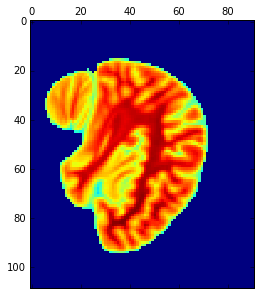

In [19]:
# the matplotlib functiont to show a matrix is matshow
plt.matshow(slc)

Hmmmm. What if we instead plotted this as an image? (`matshow` is mostly for looking at matrices. The following command is better for visualizing data that are a gridded version of smooth information, like an image. You may often want to try this both ways.)

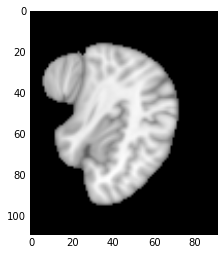

In [20]:
plt.imshow(slc, cmap='gray')  # cmap is for colormap

Let's take another slice, this time letting axes 0 and 1 vary:

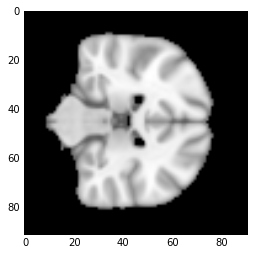

In [21]:
plt.imshow(arr[:, 48, :], cmap='gray')

And one more...

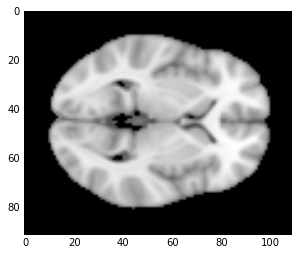

In [22]:
plt.imshow(arr[:, :, 37], cmap='gray')

So the array in question is actually a 3d image! And by fixing one of the coordinate dimensions of the array, we have reduced the 3d image to a 2d image. Note also a few important conventions:
- For MRI images, the data array indices correspond to x, y, and z coordinates. These are typically in RAS+ convention, where x increases to the Right, y increases as we move Anterior, and z increases as we move Superior. 
- Fixing one coordinate (z above) gives a 2d array with x and y coordinates. However, in the image, the x direction (left-right) is plotted up-down, while the y direction (anterior-posterior) is plotted left-right. This is because functions like `matshow` and `imshow` follow the matrix convention, in which the first index is for rows and the second index is for columns. This is typically what we want: the rows of the matrix become the rows of the image.
- Along the same lines, the vertical axis increases as one moves *down*, which is the opposite of normal plotting convention but the most sensible for matrices, where row index increases as we move down. When plotting matrices as data, make sure you know which convention is being used.


# Activity: localizing a structure

The orbitofrontal cortex is an area of the brain known to be involved in a large number of cognitive functions, particularly related to reward and decision making. Suppose you perform a study and find a large BOLD (blood oxygenation level-dependent) signal response at coordinates (50, 85, 25). 

## Exercise:

Plot three sections through the brain that contain this point, showing the point with a bright red dot in each one.

Hints:
- Go ahead and issue the command 
```
plt.figure(figsize=(15, 15))
```
before you plot anything. This will make the figure size bigger and easier to see.
- It will be helpful to use the `subplot` command ([example](http://matplotlib.org/examples/pylab_examples/subplot_demo.html)) to arrange the three plots into one. You will need to specify how many rows your images should be arranged into, how many columns, and which image you want (note that, as opposed to typical Python, these indices start at 1).
- Use `plt.scatter` ([example](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html)) to place a single dot on each image.
    - You will have to specify only one x and one y, but keep in mind that the first number is horizontal and the second number is vertical, as with standard plotting (but not matrix plotting)!
    - You will need to supply both the `color` and `s` (size) arguments.

## Solution:

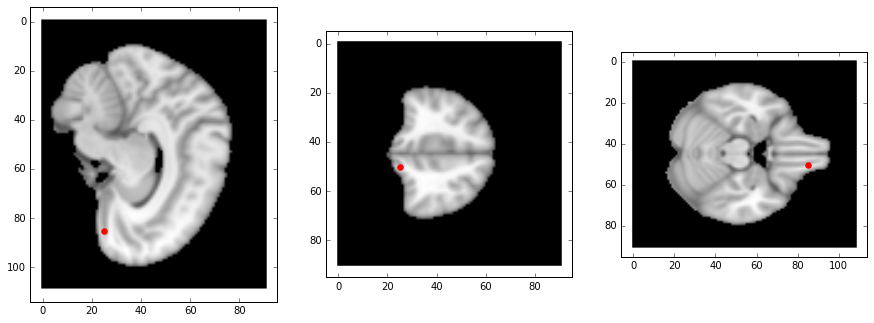

In [23]:
cc = (50, 85, 25)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(arr[cc[0], :, :], cmap='gray')
plt.scatter(cc[2], cc[1], color='r', s=30)
plt.subplot(1, 3, 2)
plt.imshow(arr[:, cc[1], :], cmap='gray')
plt.scatter(cc[2], cc[0], color='r', s=30)
plt.subplot(1, 3, 3)
plt.imshow(arr[:, :, cc[2]], cmap='gray')
plt.scatter(cc[1], cc[0], color='r', s=30)

# Array Math:

The benefit of storing data in arrays is not merely that it makes organizing multidimensional data easier. DataFrames have many more advantages in this way and automate many powerful transformations. Instead, arrays are primarily useful to us because they make numerical operations easier.

Consider, for example, the following array

In [24]:
aa = np.array([[5, -7, 3.4], [6, -1, -1]])
print(aa)

[[ 5.  -7.   3.4]
 [ 6.  -1.  -1. ]]


If we write something like

```
aa + 1.1
```

we typically mean that we want to add 1.1 to each entry, and this is exactly what NumPy does:

In [25]:
aa + 1.1

array([[ 6.1, -5.9,  4.5],
       [ 7.1,  0.1,  0.1]])

## Broadcasting

But NumPy is much smarter than that. If we creat two more arrays

In [26]:
bb = np.array([3, -3])
cc = np.array([7, 4, 0])

We might want to add them, but addition is typically only defined for matrices of the same shape:

In [27]:
print(aa.shape)
print(bb.shape)

(2, 3)
(2,)


Now what we could want in this case is for NumPy to treat `bb` as having shape (2, 1) (a column vector) and simply add this column to *each* column of `aa`. This is mathematically equivalent to creating a new array of shape (2, 3) with one copy of `bb` in each column, which is then the same size as `aa`.

That is, we could do

In [28]:
# make a matrix by repeating the bb column twice
bbb = np.c_[bb, bb, bb]  # concatenate along columns
print(bbb)
print(bbb.shape)

print(bbb + aa)

[[ 3  3  3]
 [-3 -3 -3]]
(2, 3)
[[ 8.  -4.   6.4]
 [ 3.  -4.  -4. ]]


But clearly, this is difficult to type out if `aa` is of shape (2, 5000) and `bb` is of shape (2,). If we ask NumPy to multiply these things, it should make some reasonable guesses as to how to expand the dimensions of the arrays in order to do this and complain if it can't.

This feature of NumPy goes under the name of *broadcasting*. There are very detailed rules about how NumPy makes the shapes of different arrays match up, which are detailed [here](http://wiki.scipy.org/EricsBroadcastingDoc). In the simplest cases this, happens like so:

In [29]:
print(bb.shape)
print(bb[:, np.newaxis].shape)
print(aa + bb[:, np.newaxis])

(2,)
(2, 1)
[[ 8.  -4.   6.4]
 [ 3.  -4.  -4. ]]


Basically, we use the `np.newaxis` keyword to add an additional dimension (of size 1) to `bb` in the position we choose, making `bb` of shape (2, 1), and then NumPy sees that `aa` and `bb` share a first dimension and makes a good guess about how to broadcast them together.

Similarly, the following also works:

In [30]:
print(aa + cc[np.newaxis, :])

[[ 12.   -3.    3.4]
 [ 13.    3.   -1. ]]


## Altering arrays

Clearly, another thing we might want to do to our arrays is change their entries. In the case of changing single entries, this is pretty easy to do:

In [31]:
print(aa)
aa[0][1] = 5
print('-----------------')
print(aa)

[[ 5.  -7.   3.4]
 [ 6.  -1.  -1. ]]
-----------------
[[ 5.   5.   3.4]
 [ 6.  -1.  -1. ]]


But we can assign slices as well:

In [32]:
print(aa)
aa[1] = 0.1
print('-----------------')
print(aa)

[[ 5.   5.   3.4]
 [ 6.  -1.  -1. ]]
-----------------
[[ 5.   5.   3.4]
 [ 0.1  0.1  0.1]]


In [33]:
print(aa)
aa[1] = [1, 2, 3]
print('-----------------')
print(aa)

[[ 5.   5.   3.4]
 [ 0.1  0.1  0.1]]
-----------------
[[ 5.   5.   3.4]
 [ 1.   2.   3. ]]


Note that in the latter case, we've actually assigned a *list*, not an array, to the slice `aa[1]`, but NumPy is smart enough to convert it to an array before assigning it.

**Important**: Notice how each time we perform an assignment above, we altered the original array, `aa`. This is almost always what we want. Often, our arrays are very large, and it costs less memory to only have one copy of a giant array, with different variables referring to slices of that array (like addresses). In NumPy parlance, we say that indexing or slicing returns a *view* of the array, not a *copy*.

Be careful this distinction doesn't bite you. For instance

In [34]:
aaa = aa[0]
print(aa)
print('-----------------')
print(aaa)
print('-----------------')
aaa[2] = -100
print(aa)
print('-----------------')
print(aaa)

[[ 5.   5.   3.4]
 [ 1.   2.   3. ]]
-----------------
[ 5.   5.   3.4]
-----------------
[[   5.    5. -100.]
 [   1.    2.    3.]]
-----------------
[   5.    5. -100.]


Here, we simply assigned the name `aaa` to a view of `aa`; both variables still pointed to the same place in memory, so when we changed its value, it changed for both variables.

Often, this is what we want. When we don't it's best to make a copy:

In [35]:
aaa = aa[0].copy()
print(aa) 
print('-----------------')
print(aaa)
print('-----------------')
aaa[2] = 501
print(aa)
print('-----------------')
print(aaa)

[[   5.    5. -100.]
 [   1.    2.    3.]]
-----------------
[   5.    5. -100.]
-----------------
[[   5.    5. -100.]
 [   1.    2.    3.]]
-----------------
[   5.    5.  501.]


## Changing dimensions

Finally, there are times when you would like to change which dimension corresponds to rows and which to columns (for instance, flipping an image around the diagonal). In the 2d case, this is equivalent to matrix transposition:

In [36]:
print(aa)
print('-----------------')
print(aa.T)
print('-----------------')
print(aa.shape, aa.T.shape)

[[   5.    5. -100.]
 [   1.    2.    3.]]
-----------------
[[   5.    1.]
 [   5.    2.]
 [-100.    3.]]
-----------------
(2, 3) (3, 2)


For a matrix with more than two dimensions, transposition reverses the list of dimensions, so that the last becomes first, first becomes last, etc. You can also specify a custom reordering (see [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html)).

In [37]:
randarr = np.random.rand(5, 3, 7, 2, 6)  # a 5 x 3 x 7 array of random numbers
print(randarr.shape, randarr.T.shape)

(5, 3, 7, 2, 6) (6, 2, 7, 3, 5)


# Activity: Color Images

On computers, the simplest type of color image encoding is an M x N x 3 array. This represents an M x N image where each of the final dimensions represents a unique color channel (red, green, and blue). Matplotlib understands this, and will handle this automatically.

## Exercise:

Download any png file from the internet and save it to your working directory. (You may try using a `.jpg` or other file formats, but they are not guaranteed to work.) Then use `imread` and `imshow` to display it in the notebook like so:

(153, 128, 3)


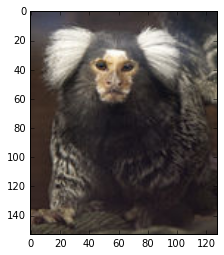

In [38]:
img = plt.imread('marmoset.jpg')
print(img.shape)
plt.imshow(img)

Now use what you've learned about arrays to adjust the red-green-blue color balance of the image.

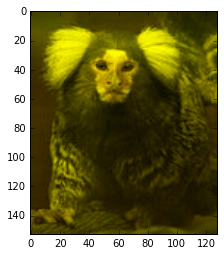

In [39]:
img2 = img.copy()
img2[:, :, 2] = 0
plt.imshow(img2)

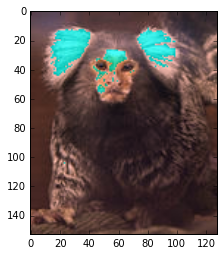

In [40]:
img3 = img
img3[:, :, 0] = img3[:, :, 0] * 1.3
plt.imshow(img3)

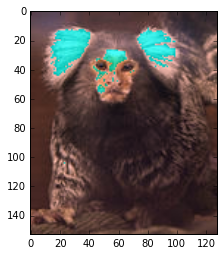

In [41]:
plt.imshow(img)

### Challenge Questions:

1. Why did the original image change?
1. Can you flip the image horizontally?
1. Can you rotate the image $90^\circ$?

If you're interested in learning more about images in Matplotlib, you can read the tutorial [here](http://matplotlib.org/users/image_tutorial.html). 

# Learning More:

NumPy is a powerful library, with incredibly flexible syntax, but for beginners, the code can be a little cryptic. Some suggested reading:

- An extensive tutorial on NumPy is available [here](http://wiki.scipy.org/Tentative_NumPy_Tutorial). 
- Once you're familiar with basic Python, [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) is a good book, covering some NumPy and SciPy, but particularly focused on Pandas (Wes McKinney, the author, was also the creator and lead developer of Pandas).

# Bonus: NaN and missing data

If you analyze data for any amount of time, you will have to deal with missing data. Sometimes data are lost &mdash; subjects withdraw, files are lost, or a given condition was not run for a particular session &mdash; and in that case, we would like a way to indicate that a matrix of data has missing entries.

Other times, we have data, but some quantity we calculate turns out to be ill-defined. For instance, we might want to standardize our data, subtracting the mean and dividing by the standard deviation (this results in data with mean 0 and standard deviation 1 &mdash; a convenient thing to have). 

But what if we only have one data point? In this case the standard deviation of that data set is 0, and division by 0 is undefined.

Clearly these are different types of situations. In the R language, the first case of missing data is coded `NA` (not available), while the second case is coded `NaN` (not a number). 

Python handles the second case in exactly the same way (`NaN` is an international standard), whereas the second case is handled with masking, in the form of NumPy's masked arrays.

In [42]:
print(np.array([1., np.inf, -7, 0]) / 0.0)
print(np.inf / np.inf)

[ inf  inf -inf  nan]
nan


/Users/jmxp/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/jmxp/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Note that some constants like $\infty$ and `NaN` are accessible within the NumPy package as `np.inf`, `np.nan`.

In [43]:
# we can test for nan:
myarr = np.array([1, -3, np.nan, 8, np.nan])
np.isnan(myarr)

array([False, False,  True, False,  True], dtype=bool)

We can use a boolean (True/False) array to index into a data array of the same size. When the index array is true, we pull out the corresponding elements of the data array:

In [44]:
nan_arr = np.isnan(myarr)

# get entries that are not NaN (~ is negation)
myarr[~nan_arr]

array([ 1., -3.,  8.])

## Ignoring NaNs

Something that often happens is that we want to ignore `NaN`s in our data. Perhaps we want to take a mean that does not take into account any of these undefined entries:

In [45]:
print(myarr.mean())
print(np.nanmean(myarr))

nan
2.0


In addition, Matplotlib ignores `NaN` entries when plotting:

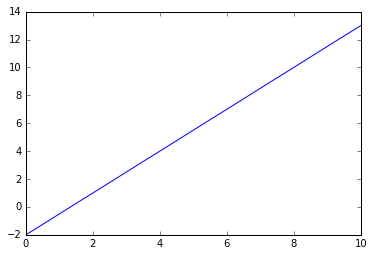

In [46]:
xx = np.linspace(0, 10, 500)  # make 500 uniformly spaced points between 0 and 10
yy = 1.5 * xx - 2
plt.plot(xx, yy)

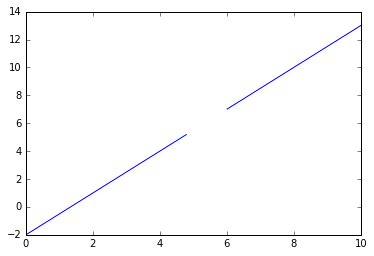

In [47]:
yy[240:300] = np.nan
plt.plot(xx, yy)

## Masking Data

Masking is a way of adding additional information to an `ndarray` to tell Python that a given entry is missing or otherwise invalid. We might want to do this for several reasons:

- The data are legitimately missing, as in the examples above.
- The data are censored. That is, the reading from our sensor is pegged at some maximum value, $M$, and so all we know is that $x \ge M$.
- The measurement is somehow invalid. For instance, a negative number for a length.

In all of these cases, we might want to mask the invalid data.

For example:

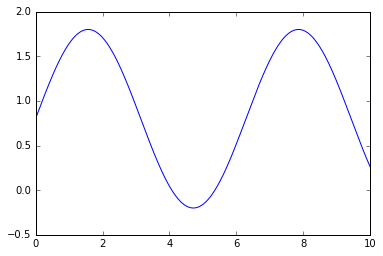

In [48]:
npts = 500
xx = np.linspace(0, 10, npts)
yy = np.sin(xx) + 0.8

plt.plot(xx, yy)

Let's say all the readings below 0 are invalid. We can fix this. The [`numpy.ma` module](http://docs.scipy.org/doc/numpy/reference/maskedarray.html) contains functions relating to masked arrays, including functions to mask data inside a range, greater or less than a given value, or where a particular truth condition is met:

In [49]:
masked_yy = np.ma.masked_less(yy, 0)  # mask where yy < 0

In [50]:
print(yy.mean())
print(masked_yy.mean())

0.982989174926
1.14678171355


Clearly, the second average is higher. This is because it excludes all the negative numbers.

Similarly, plots exclude masked values:

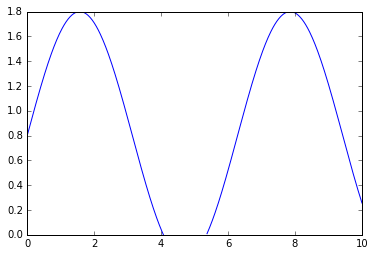

In [51]:
plt.plot(xx, masked_yy)

This is potentially most useful with images. For instance, we can mask our brain images from earlier by constructing the mask ourselves:

In [52]:
# the mask should be logical and of the same size as arr
# here, we set all entries to True, which masks all data by default
mask = np.ones(arr.shape, dtype='bool')

In [53]:
# the mask should be true for the data we *don't* want to use
# unmask the window: x in [60, 75), y in [50, 90), z in [20, 60)
mask[60:75, 50:90, 20:60] = False

In [54]:
masked_arr = np.ma.masked_array(arr, mask=mask)

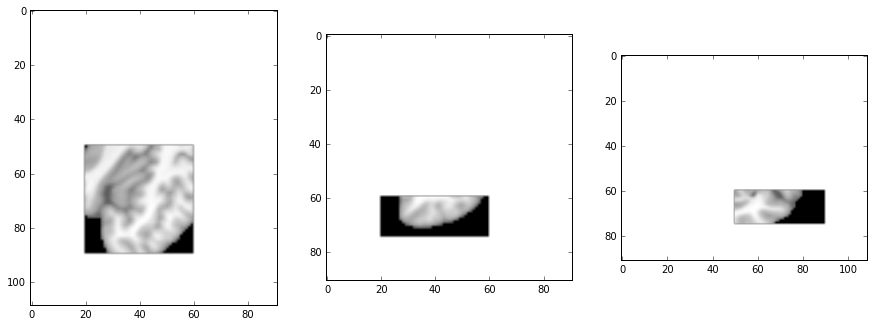

In [55]:
cc = (65, 85, 25)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(masked_arr[cc[0], :, :], cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(masked_arr[:, cc[1], :], cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(masked_arr[:, :, cc[2]], cmap='gray')

In this way, we can restrict our analysis to a particular region of interest inside the image; all other data will be ignored. In real MRI analysis, the mask is often based on anatomy, so that we restrict our data to a particular brain structure or structures. 

# Additional Reading:

For more on this, there are lots of great resources:
- Again, the [Tentative NumPy tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial) is focused on the mechanics of NumPy arrays
- [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) is now *slightly* out of date, but is the best introduction to Pandas (and covers some NumPy along the way).
- Kevin Sheppard has a briskly-paced (but quite nice) [Introduction to Python for Econometrics](https://www.kevinsheppard.com/images/0/09/Python_introduction.pdf) that covers material in the order it tends to be useful to scientists (i.e., data up front, object oriented programming in back). For more, including videos, see [his website](https://www.kevinsheppard.com/Python_Course)